# Portfolio Methodolgy

1. DGI - Rebalance every 6 months picking around 10 - 30 names from CA and US universe
    - Add names slowly, 2-3 names a month
    - GTC Stop Limit of 3% on each name
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: MU AMD MSFT TTWO
    - AMD Earnings: Oct 22
    - MSFT Earnings: Oct 24
    - TTWO Earnings: Nov 5
    - MU Earnings: Dec 17
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|DGI|15%|10/01/2018|11/01/2018|1/2/2019|
|VAA/PAA|15%|10/01/2018|11/01/2018|11/01/2018|
|LEAPs|1.5%|10/4/2018|10/22/2018|12/1/2018|
|Short Vol|2%|10/4/2018|10/5/2018|10/12/2018|
|Barbell Hedging|1.5%||||
|Treasuries|60%|10/4/2018|10/24/2018|10/5/2018|

In [1]:
# Importing necessary models
import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *

os.chdir(main_dir)

# Allocate Smartly Checking

In [ ]:
# Short Call Assignment Price - 287.5

portfolio_value =  200000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

## Checking market correlations

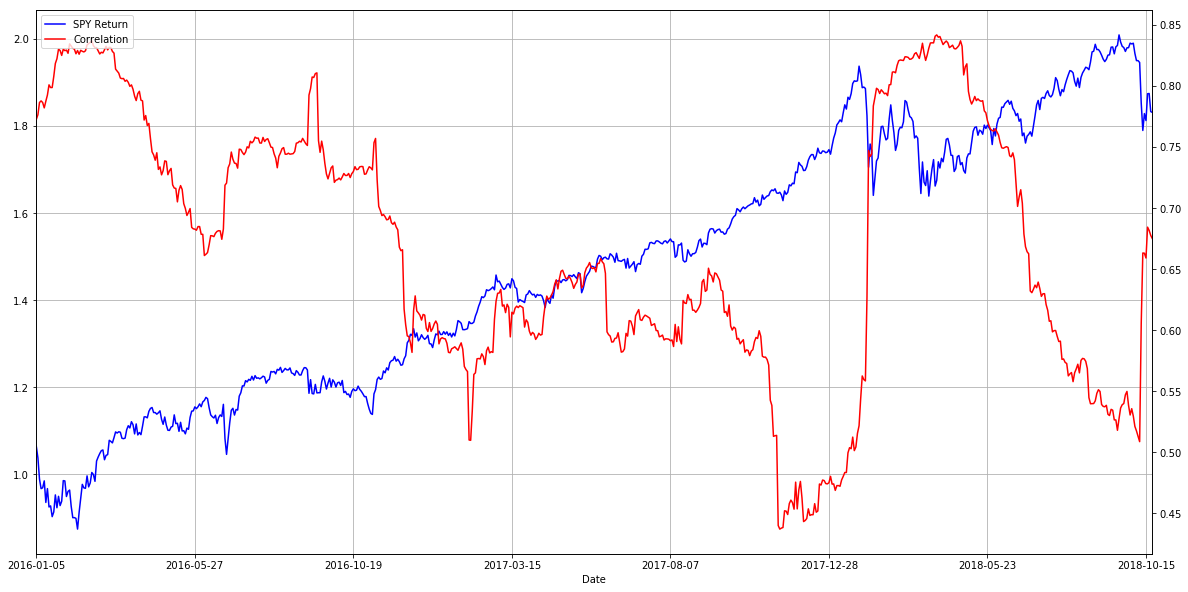

                XLRE       XLV       XLI       XLK       XLP       XLU  \
2018-10-15  0.478333  0.890293  0.761975  0.871014  0.500660  0.225269   
2018-10-16  0.532334  0.907499  0.780780  0.886814  0.536781  0.272353   
2018-10-17  0.537344  0.905306  0.775341  0.885260  0.535126  0.269248   
2018-10-18  0.507368  0.907377  0.782762  0.887985  0.516029  0.254611   
2018-10-19  0.503739  0.895938  0.791707  0.894606  0.481226  0.255217   

                 XLB       XLY       XLF       XLE  Avg_Corr   SPY_cum  
2018-10-15  0.639786  0.870967  0.724222  0.628712  0.659123  1.812556  
2018-10-16  0.667870  0.883684  0.754350  0.621229  0.684369  1.874055  
2018-10-17  0.663802  0.884840  0.744730  0.615506  0.681650  1.874568  
2018-10-18  0.664434  0.890901  0.761987  0.602676  0.677613  1.833056  
2018-10-19  0.670401  0.884231  0.760728  0.612437  0.675023  1.831211  


In [23]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [24]:
((sector_df.dropna() + 1).cumprod()-1).tail()

,SPY,XLRE,XLV,XLI,XLK,XLP,XLU,XLB,XLC,XLY,XLF,XLE
2018-10-15,-0.003993,-1.587302e-02,0.065755,0.011061,-0.02464,0.032119,0.059972,-0.083946,-0.075460,-0.031759,-0.038026,-0.031442
2018-10-16,0.017786,2.539683e-03,0.094980,0.028131,0.00476,0.043674,0.070930,-0.069243,-0.051041,-0.012346,-0.021938,-0.023415
2018-10-17,0.017967,-3.174603e-04,0.100754,0.020620,0.00014,0.048570,0.068938,-0.075227,-0.047238,-0.020487,-0.012066,-0.029569
2018-10-18,0.003267,-2.220446e-16,0.088263,0.003004,-0.01946,0.047199,0.070532,-0.085656,-0.064652,-0.039274,-0.028519,-0.034386
2018-10-19,0.002613,1.015873e-02,0.078247,-0.000683,-0.01988,0.071093,0.087268,-0.092153,-0.064852,-0.048667,-0.024863,-0.043083


## Earnings

In [15]:
earnings_df = date_earnings('2018-10-20')

In [17]:
earnings_df[earnings_df['Call Time'] == 'Before Market Open']

,Call Time,EPS Estimate,Name
ABCB,Before Market Open,0.9,Ameris Bancorp
STI,Before Market Open,1.39,SunTrust Banks Inc
OFG,Before Market Open,0.36,OFG Bancorp
SXT,Before Market Open,0.95,Sensient Technologies Corp
STT,Before Market Open,1.89,State Street Corp
CLF,Before Market Open,0.66,Cleveland-Cliffs Inc
PG,Before Market Open,1.09,Procter &amp; Gamble Co
IPG,Before Market Open,0.46,Interpublic Group of Companies Inc
IBKC,Before Market Open,1.68,IBERIABANK Corp
KSU,Before Market Open,1.57,Kansas City Southern


In [20]:
earnings_report("ABCB")

C:\Users\Fang\Desktop\Python Trading\Trading\Trading\Modules\DataCollection\option_slam_earnings.py:109: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ABCB,ABCB_closeToOpen,Financial Services Beta,MarketBeta,ABCB_52WeekReturn,SPY_52WeekReturn,XLF_52WeekReturn
2016-07-22,BO,0.014436,0.862022,0.807124,0.156736,0.023570,-0.080141
2016-10-17,BO,0.013136,0.494829,0.317581,0.253679,0.053225,0.021188
2017-01-20,BO,-0.005917,0.692392,0.416560,0.442964,0.216860,0.351226
2017-04-21,BO,0.005464,0.683859,0.581373,0.475331,0.120133,0.223679
2017-07-21,BO,0.086956,0.759544,0.281678,0.548440,0.138238,0.290858
2017-10-19,BO,-0.040445,0.765563,0.528865,0.383217,0.196575,0.349923
2018-01-26,BO,0.063611,0.594572,0.455770,0.165758,0.234046,0.264780
2018-04-20,BO,-0.040797,0.808774,0.725406,0.182941,0.151859,0.211213
2018-07-27,BO,-0.034415,0.501465,0.331895,0.106638,0.145132,0.120559
2018-10-19,BO,NaN,0.487453,0.298058,-0.128817,0.080870,0.009882


## Barbell Hedging

In [21]:
ratios = spx_put_backratios(50, 5, 0.05, 2, 50)

C:\Users\Fang\Desktop\Python Trading\Trading\Trading\Modules\Options\optionsFunctions.py:321: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Fang\Desktop\Python Trading\Trading\Trading\Modules\Options\optionsFunctions.py:322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [22]:
ratios[(ratios.DTE >= 7)]

,index,Strike,Expiry,DTE,Type,IV,Underlying_Price,Last,Bid,Ask,Moneyness,Mid,Short_Strike,Short_Mid,Credit
5,12,2705.0,2018-10-29,9,put,0.193688,2765.5,14.90,13.6,14.1,0.021877,13.85,2765.0,28.90,1.200000e+00
15,14,2695.0,2018-10-29,9,put,0.198143,2765.5,8.30,11.9,12.3,0.025493,12.10,2755.0,24.70,5.000000e-01
22,18,2675.0,2018-10-29,9,put,0.212197,2765.5,9.97,9.5,10.0,0.032725,9.75,2735.0,19.60,1.000000e-01
25,17,2680.0,2018-10-29,9,put,0.208535,2765.5,7.00,10.1,10.5,0.030917,10.30,2740.0,20.65,5.000000e-02
26,21,2655.0,2018-10-29,9,put,0.224053,2765.5,6.50,7.6,8.0,0.039957,7.80,2715.0,15.60,1.776357e-15


In [30]:
os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\Modules\\Earnings')

# from finstatement_cleaning import ratio_calc

def ratio_calc(in_df):
    df = in_df[['index','Underlying']]
    df['current_ratio'] = in_df['totalCurrentAssets']/in_df['totalCurrentLiabilities']
    df['total_debt_equity_ratio'] = in_df['totalCurrentLiabilities']/in_df['totalStockholderEquity']

    ## Liquidity Ratios
    df['day_payable_outstanding'] = 365*(in_df['accountsPayable']/in_df['costOfRevenue'])

    ## Capital Structure Ratios
    df['total_liabilities_total_assets'] = in_df['totalLiab']/in_df['totalAssets']

    ## Income Statement Ratios
    df['gross_margin'] = in_df['grossProfit']/in_df['totalRevenue']
    df['operating_margin'] = in_df['operatingIncome']/in_df['totalRevenue']
    df['net_profit_margin'] = in_df['netIncome']/in_df['totalRevenue']
    
    ## Cash Flow Ratios
    df['changeInCash'] = in_df['changeInCash']/in_df['cash']
    df['changeToLiabilities'] = in_df['changeToLiabilities']/in_df['totalLiab']
    df['changeToNetincome'] = in_df['changeToNetincome']/in_df['netIncome']
    df['changeToOperatingActivities'] = in_df['changeToOperatingActivities']/in_df['totalCashFromOperatingActivities']
    
    return df

os.chdir(main_dir)

from fundamental_data_collect import download_yahoo_data

In [33]:
latest_earnings_names = earnings_df[earnings_df['Call Time'] == 'Before Market Open'].index.tolist()

earnings_df, annual_df, keyStats_df, failed_list = download_yahoo_data(latest_earnings_names, retries = 3)

Accepted: ABCB
5.56% Completed
0 total failures
Accepted: STI
11.11% Completed
0 total failures
Accepted: OFG
16.67% Completed
0 total failures
Accepted: SXT
22.22% Completed
0 total failures
Accepted: STT
27.78% Completed
0 total failures
Accepted: CLF
33.33% Completed
0 total failures
Accepted: PG
38.89% Completed
0 total failures
Accepted: IPG
44.44% Completed
0 total failures
Accepted: IBKC
50.00% Completed
0 total failures
Accepted: KSU
55.56% Completed
0 total failures
Accepted: CFG
61.11% Completed
0 total failures
Accepted: VFC
66.67% Completed
0 total failures
Accepted: GNTX
72.22% Completed
0 total failures
Accepted: EEFT
77.78% Completed
0 total failures
Accepted: SYF
83.33% Completed
0 total failures
Accepted: HON
88.89% Completed
0 total failures
Accepted: MAN
94.44% Completed
0 total failures
Accepted: MINI
100.00% Completed
0 total failures
